<a href="https://colab.research.google.com/github/hamednasr/neural-network-calculator/blob/main/my_code_neural_network_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **neural network calculator**

In [238]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from IPython import display
display.set_matplotlib_formats('svg')

# creat data sets

In [239]:
data = np.random.randint(-20,21,(1000,2))
data

array([[  0,   4],
       [ -1,   2],
       [-15,  19],
       ...,
       [ 11,  19],
       [ 14, -15],
       [ 18,  -5]])

In [240]:
z = np.sum(data, axis =1)
z = z[:,None]
z

array([[  4],
       [  1],
       [  4],
       [ 27],
       [ -4],
       [ 23],
       [  1],
       [ 24],
       [ 18],
       [-24],
       [-19],
       [-12],
       [  7],
       [-10],
       [  3],
       [ 28],
       [ 20],
       [ 23],
       [ -3],
       [-29],
       [-11],
       [ 15],
       [-16],
       [-22],
       [ -8],
       [ 10],
       [ -3],
       [ -2],
       [ 10],
       [ -3],
       [ -6],
       [ 27],
       [-34],
       [ 30],
       [ 31],
       [-13],
       [ 13],
       [ -6],
       [ 28],
       [ 26],
       [-26],
       [ 23],
       [ -7],
       [-14],
       [-15],
       [ -7],
       [ -1],
       [ 16],
       [-22],
       [ -6],
       [  8],
       [ 35],
       [ -7],
       [-11],
       [ 39],
       [ 32],
       [  9],
       [-25],
       [ -8],
       [ 20],
       [-22],
       [ -5],
       [ 29],
       [ -7],
       [ -2],
       [ 21],
       [  1],
       [  5],
       [  7],
       [ 12],
       [ -1],
      

In [241]:
dataT = torch.FloatTensor(data)
dataT

tensor([[  0.,   4.],
        [ -1.,   2.],
        [-15.,  19.],
        ...,
        [ 11.,  19.],
        [ 14., -15.],
        [ 18.,  -5.]])

In [242]:
zT=torch.FloatTensor(z)
zT

tensor([[  4.],
        [  1.],
        [  4.],
        [ 27.],
        [ -4.],
        [ 23.],
        [  1.],
        [ 24.],
        [ 18.],
        [-24.],
        [-19.],
        [-12.],
        [  7.],
        [-10.],
        [  3.],
        [ 28.],
        [ 20.],
        [ 23.],
        [ -3.],
        [-29.],
        [-11.],
        [ 15.],
        [-16.],
        [-22.],
        [ -8.],
        [ 10.],
        [ -3.],
        [ -2.],
        [ 10.],
        [ -3.],
        [ -6.],
        [ 27.],
        [-34.],
        [ 30.],
        [ 31.],
        [-13.],
        [ 13.],
        [ -6.],
        [ 28.],
        [ 26.],
        [-26.],
        [ 23.],
        [ -7.],
        [-14.],
        [-15.],
        [ -7.],
        [ -1.],
        [ 16.],
        [-22.],
        [ -6.],
        [  8.],
        [ 35.],
        [ -7.],
        [-11.],
        [ 39.],
        [ 32.],
        [  9.],
        [-25.],
        [ -8.],
        [ 20.],
        [-22.],
        [ -5.],
        

# create dataloader objects

In [243]:
train_data,test_data,train_labels,test_labels = train_test_split(dataT,zT,test_size=0.1)

train_sets = TensorDataset(train_data,train_labels)
test_sets = TensorDataset(test_data,test_labels)

batchsize = 32
train_loader = DataLoader(train_sets, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_sets, batch_size=test_sets.tensors[0].shape[0])

In [244]:
train_loader.dataset.tensors

(tensor([[ -8., -11.],
         [-16., -20.],
         [-15.,  10.],
         ...,
         [  3.,   4.],
         [  8.,   1.],
         [-16.,  10.]]), tensor([[-19.],
         [-36.],
         [ -5.],
         [  1.],
         [ 14.],
         [  7.],
         [ 18.],
         [ -7.],
         [ 23.],
         [  6.],
         [ -5.],
         [ -6.],
         [-34.],
         [ 18.],
         [-25.],
         [-29.],
         [ -7.],
         [ 14.],
         [ 15.],
         [  7.],
         [ -4.],
         [  9.],
         [ -1.],
         [-32.],
         [-13.],
         [-11.],
         [  8.],
         [-19.],
         [-38.],
         [-26.],
         [-24.],
         [ 31.],
         [ 33.],
         [ -9.],
         [ -3.],
         [ 22.],
         [  4.],
         [-21.],
         [-18.],
         [-14.],
         [-30.],
         [-24.],
         [ 17.],
         [ -7.],
         [-16.],
         [ 11.],
         [ 34.],
         [-20.],
         [ 10.],
         [  0.

# creat model

In [245]:
def CreatModel():

  ANNcal = nn.Sequential(
              nn.Linear(2,128),
              nn.ReLU(),
              nn.Linear(128,256),
              nn.ReLU(),
              nn.Linear(256,256),
              nn.ReLU(),
              nn.Linear(256,1) 
                        )

  lossfun = nn.MSELoss()

  optimizer = torch.optim.Adam(params=ANNcal.parameters(), lr=0.001)

  return ANNcal, lossfun, optimizer

## test the created model:

In [246]:
ANNcal, lossfun, optimizer = CreatModel()
d = torch.FloatTensor(np.random.randint(-20,21,(3,2)))

l = torch.sum(d,axis=1)
l = l[:,None]
# print(d)
print('data is: \n', d)
print('label is: \n', l)
print(l.shape)
yhat = ANNcal(d)
print('yhat is: ',yhat)
print(nn.MSELoss()(yhat,l))#.detach().item()
# print('yhat is: \n', yhat)
np.corrcoef(l.T,yhat.detach().T)[0,1]

data is: 
 tensor([[  0.,   5.],
        [-11., -11.],
        [ -2., -15.]])
label is: 
 tensor([[  5.],
        [-22.],
        [-17.]])
torch.Size([3, 1])
yhat is:  tensor([[-0.0137],
        [-0.3886],
        [-0.3056]], grad_fn=<AddmmBackward0>)
tensor(256.9646, grad_fn=<MseLossBackward0>)


0.9993035133733508

# Train Model

In [247]:
epochs = 10
def TrainModel():

  ANNcal, lossfun, optimizer = CreatModel()
  trainAcc = []
  testAcc = []
  losses = []

  for i in range(epochs):

    batchAcc = []
    batchLoss = []

    for X,y in train_loader:
      
      yhat = ANNcal(X)

      
      loss = lossfun(yhat,y)

      batchLoss.append(loss.detach().item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      ypred = torch.round(yhat.detach())
      
      batchAcc.append(np.mean((ypred == y).float().tolist())*100)

    
    losses.append(np.mean(batchLoss))
    trainAcc.append(np.mean(batchAcc))

    X,y = next(iter(test_loader))
    yhat = ANNcal(X)
    ypred = torch.round(yhat.detach())
    testAcc.append(np.mean((ypred == y).float().tolist())*100)

  

  return ANNcal, trainAcc, testAcc, losses 


In [248]:
ANNcal, trainAcc, testAcc, losses  = TrainModel()

In [249]:
losses

[62.89349301159382,
 1.4246961091245924,
 0.15451507749302046,
 0.018959010668498064,
 0.007080352989890214,
 0.0035452733198846026,
 0.002591772873919191,
 0.0020445447298698127,
 0.0019901306908910294,
 0.0016125320336349042]

In [250]:
predictions = ANNcal(test_data)

In [251]:
torch.round(predictions.squeeze().detach()[:10])

tensor([ 14.,  19.,  11.,   9.,  11.,  19.,   9., -18.,   8., -26.])

In [252]:
test_labels.squeeze()[:10]

tensor([ 14.,  19.,  11.,   9.,  11.,  19.,   9., -18.,   8., -26.])

In [253]:
testAcc

[20.0, 43.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

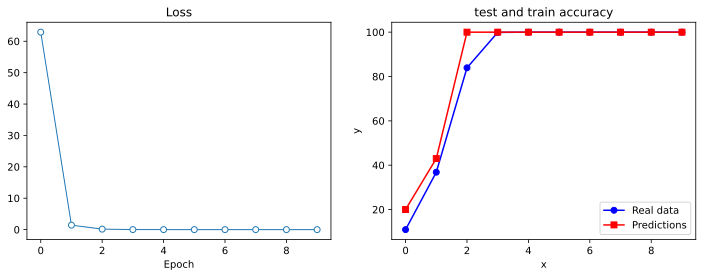

In [254]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses,'o-',markerfacecolor='w',linewidth=1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(range(epochs),trainAcc,'bo-',label='Real data')
ax[1].plot(range(epochs),testAcc,'rs-',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('test and train accuracy')
ax[1].legend()

plt.show()